In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/28k-s24-balan-vombas/sensor2-ordenado_status_sin_broken_balanced_28k.csv


In [2]:
# https://medium.com/@randerson112358/build-your-own-artificial-neural-network-using-python-f37d16be06bf

In [3]:
#Load libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
import time

In [5]:
#sensor77 = pd.read_csv('../input/vombas/sensor_procesado.csv')
#sensor77 = pd.read_csv('../input/10ks25/s25balanced10k.csv')
sensor77 = pd.read_csv('../input/28k-s24-balan-vombas/sensor2-ordenado_status_sin_broken_balanced_28k.csv')


In [6]:
#Show the shape (number of rows & columns)
sensor77.shape

(28002, 27)

In [7]:
#Show the number of missing (NAN, NaN, na) data for each column
sensor77.isnull().sum()

Unnamed: 0            0
timestamp             0
sensor_00             0
sensor_01            30
sensor_02             0
sensor_03             0
sensor_04             0
sensor_11             0
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_30             0
sensor_31             0
sensor_44             3
sensor_50         14004
sensor_51          2996
machine_status        0
dtype: int64

In [8]:
cleanup_nums = {"machine_status":     {"NORMAL": 0, "RECOVERING": 1,"BROKEN": 2}}

In [9]:
sensor77.replace(cleanup_nums, inplace=True)

In [10]:
sensor77.fillna(sensor77.mean(), inplace=True)

In [11]:
#Show the number of missing (NAN, NaN, na) data for each column
sensor77.isnull().sum()

Unnamed: 0        0
timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_11         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_30         0
sensor_31         0
sensor_44         0
sensor_50         0
sensor_51         0
machine_status    0
dtype: int64

In [12]:
#sensor77.drop('sensor_15', axis=1, inplace=True)
sensor77.drop('timestamp', axis=1, inplace=True)

In [13]:
#sensor77.drop('100000', axis=1, inplace=True)

In [14]:
sensor77.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
sensor77.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_11         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_30         0
sensor_31         0
sensor_44         0
sensor_50         0
sensor_51         0
machine_status    0
dtype: int64

In [16]:
#Convert the data into an array
dataset = sensor77.values
dataset

array([[2.46539400e+00, 4.70920100e+01, 5.32118000e+01, ...,
        4.81174107e+02, 1.77951400e+02, 0.00000000e+00],
       [2.46539400e+00, 4.70920100e+01, 5.32118000e+01, ...,
        4.81174107e+02, 1.78530100e+02, 0.00000000e+00],
       [2.44473400e+00, 4.73524300e+01, 5.32118000e+01, ...,
        4.81174107e+02, 1.77662000e+05, 0.00000000e+00],
       ...,
       [2.40538200e+00, 4.95659714e+01, 5.38194400e+01, ...,
        3.21180573e+01, 3.15393524e+01, 1.00000000e+00],
       [2.40046300e+00, 4.95659700e+01, 5.37760400e+01, ...,
        3.21180573e+01, 3.15393500e+01, 1.00000000e+00],
       [2.40144700e+00, 4.95225700e+01, 5.37760391e+01, ...,
        3.21180573e+01, 3.18287000e+01, 1.00000000e+00]])

In [17]:
sensor77.shape

(28002, 25)

In [18]:
# Get all of the rows from the first eight columns of the dataset
#X = dataset[:,0:51] 
X = dataset[:,0:24]
# Get all of the rows from the last column
#y = dataset[:,51] 
y = dataset[:,24] 

In [19]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


In [20]:
print(X)

[[2.46539400e+00 4.70920100e+01 5.32118000e+01 ... 4.36921300e+01
  4.81174107e+02 1.77951400e+02]
 [2.46539400e+00 4.70920100e+01 5.32118000e+01 ... 4.45601800e+01
  4.81174107e+02 1.78530100e+02]
 [2.44473400e+00 4.73524300e+01 5.32118000e+01 ... 4.60069400e+01
  4.81174107e+02 1.77662000e+05]
 ...
 [2.40538200e+00 4.95659714e+01 5.38194400e+01 ... 3.15393524e+01
  3.21180573e+01 3.15393524e+01]
 [2.40046300e+00 4.95659700e+01 5.37760400e+01 ... 3.15393524e+01
  3.21180573e+01 3.15393500e+01]
 [2.40144700e+00 4.95225700e+01 5.37760391e+01 ... 3.15393524e+01
  3.21180573e+01 3.18287000e+01]]


In [21]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.16018541e-03, 1.51254935e-04, 2.97595181e-04, ...,
        7.32072243e-05, 1.01425222e-03, 3.84471811e-04],
       [1.16018541e-03, 1.51254935e-04, 2.97595181e-04, ...,
        7.67494867e-05, 1.01425222e-03, 3.85953388e-04],
       [1.15046306e-03, 1.56160565e-04, 2.97595181e-04, ...,
        8.26532983e-05, 1.01425222e-03, 4.54775949e-01],
       ...,
       [1.13194447e-03, 1.97857886e-04, 3.09041171e-04, ...,
        2.36152335e-05, 1.03499268e-05, 9.63031373e-06],
       [1.12962965e-03, 1.97857860e-04, 3.08223654e-04, ...,
        2.36152335e-05, 1.03499268e-05, 9.63030754e-06],
       [1.13009271e-03, 1.97040318e-04, 3.08223638e-04, ...,
        2.36152335e-05, 1.03499268e-05, 1.03710962e-05]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [23]:
model = Sequential([
    Dense(24, activation='relu', input_shape=( 24 ,)),
    #Dense(12, activation='relu', input_shape=( 24 ,)),
    #Dense(12, activation='relu', input_shape=( 51 ,)),
    #Dense(15, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
start = time.time()
hist = model.fit(X_train, y_train,
          batch_size=10, epochs=10, validation_split=0.2)
stop = time.time()
print(f"Training time: {stop - start}s")
# prints: Training time: 0.20307230949401855s

# https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/


Epoch 1/10
1792/1792 [==============================] - 3s 2ms/step - loss: 0.4882 - accuracy: 0.8160 - val_loss: 0.3754 - val_accuracy: 0.8507
Epoch 2/10
1792/1792 [==============================] - 3s 1ms/step - loss: 0.3561 - accuracy: 0.8609 - val_loss: 0.3615 - val_accuracy: 0.8554
Epoch 3/10
1792/1792 [==============================] - 3s 2ms/step - loss: 0.3467 - accuracy: 0.8607 - val_loss: 0.3574 - val_accuracy: 0.8529
Epoch 4/10
1792/1792 [==============================] - 3s 1ms/step - loss: 0.3431 - accuracy: 0.8605 - val_loss: 0.3550 - val_accuracy: 0.8520
Epoch 5/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3403 - accuracy: 0.8623 - val_loss: 0.3533 - val_accuracy: 0.8532
Epoch 6/10
1792/1792 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.8624 - val_loss: 0.3516 - val_accuracy: 0.8532
Epoch 7/10
1792/1792 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8628 - val_loss: 0.3498 - val_accuracy:

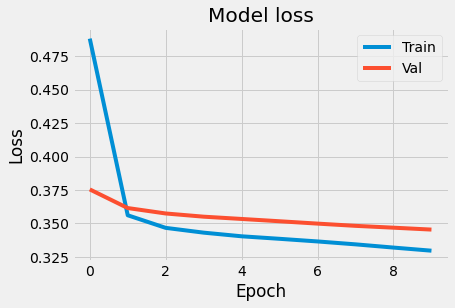

In [26]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

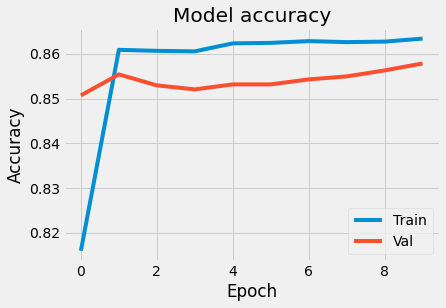

In [27]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
#prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
prediction  = [1 if y>=0.75 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 

In [29]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_train)
#pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87     11211
         1.0       0.92      0.80      0.85     11190

    accuracy                           0.86     22401
   macro avg       0.87      0.86      0.86     22401
weighted avg       0.87      0.86      0.86     22401

Confusion Matrix: 
 [[10446   765]
 [ 2269  8921]]

Accuracy:  0.864559617874202



In [30]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_test)
#pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      2790
         1.0       0.92      0.80      0.85      2811

    accuracy                           0.86      5601
   macro avg       0.87      0.86      0.86      5601
weighted avg       0.87      0.86      0.86      5601

Confusion Matrix: 
 [[2582  208]
 [ 568 2243]]

Accuracy:  0.8614533119085878



In [31]:
model.evaluate(X_test, y_test)[1]

176/176 [==============================] - 0s 935us/step - loss: 0.3366 - accuracy: 0.8615


0.8614532947540283

In [32]:
# ann cros vaidacion
# https://medium.com/datadriveninvestor/k-fold-and-dropout-in-artificial-neural-network-ea054a89fb4e

In [33]:
#builing the neural net
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [34]:
#accuracies =  cross_val_score(estimator=classifier, X= X, y=output_category,cv=10, n_jobs=-1)
#accuracies

#accuracies =  cross_val_score(estimator=model, X= X_test, y=pred,cv=5, n_jobs=-1)
#accuracies

In [35]:
# https://medium.com/analytics-vidhya/artificial-neural-network-ann-with-keras-simplified-use-case-if-student-pass-the-exam-code-949ddb2a9c91

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
def kera_classifier():
    cf = Sequential()
    #cf.add(Dense(units = 12,  activation = 'relu', input_dim = 24))
    cf.add(Dense(units = 24,  activation = 'relu', input_dim = 24))
    #cf.add(Dense(units = 12,  activation = 'relu', input_dim = 51))
    #cf.add(Dense(units = 15,  activation = 'relu'))
    cf.add(Dense(units = 30,  activation = 'relu'))
    cf.add(Dense(units = 1, activation = 'sigmoid'))
    cf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cf
start7 = time.time()
cf = KerasClassifier(build_fn = kera_classifier, batch_size = 10, epochs = 10)
#cf = KerasClassifier(build_fn = kera_classifier, batch_size = 57, epochs = 100)
#acuracies = cross_val_score(estimator = cf, X = X_train, y = y_train, cv = 10, n_jobs = -1)
#accuracies = cross_validate(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1,scoring ='accuracy')
accuracies = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1,scoring ='accuracy')
#ean = accuracies.mean()
#iance = accuracies.std()
#
prec = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='precision_macro')
f1 = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='f1')
recal = cross_val_score(cf, X = X_train, y = y_train, cv = 10, n_jobs = -1 ,scoring ='recall')
#ean1= recal.mean()
#ariance1= recal.std()

In [37]:
#print(f"accuracy:")
#print (accuracies)
#print (mean)
#print( variance)
#print(f"recall:")
#print (recal)
#print (mean1)
#print( variance1)

#
print(f"preci:")
print(prec)
print(prec.mean())
print(prec.std())
#print(variance['test_score'])
#
print(f"recall:")
print(recal)
print(recal.mean())
print(recal.std())
#print(variance['test_score'])
#
#
print(f"f1-score:")
print(f1)
print(f1.mean())
print(f1.std())
#print(variance['test_score'])
#
#
print(f"accuracy:")
print(accuracies)
print("\n")
print(accuracies.mean())
print("\n")
print(accuracies.std())
print("\n")
#print(variance['test_score'])
#
stop7 = time.time()
print(f"CV Training time: {stop7 - start7}s")

# 200 epochs
# 0.9936249911785126
# 0.003466360910457571

preci:
[0.91921404 0.92981916 0.92801816 0.91110592 0.93133164 0.91400336
 0.91084122 0.92806945 0.90848971 0.92212021]
0.9203012867802505
0.008305831254132041
recall:
[0.82252252 0.84274953 0.80455741 0.84298246 0.84615385 0.80594406
 0.80339589 0.82545455 0.78163993 0.83597884]
0.821137901505429
0.020473111804693547
f1-score:
[0.91776156 0.88784559 0.88942774 0.89157793 0.90287945 0.90883191
 0.90724638 0.9117792  0.8752495  0.9042809 ]
0.8996880163562185
0.012463546657795931
accuracy:
[0.90182954 0.90223214 0.90178571 0.89866071 0.91696429 0.89955357
 0.90892857 0.915625   0.91116071 0.909375  ]


0.9066115254669471


0.006328411497935596


CV Training time: 487.3026247024536s


In [38]:
#  Dense(12, activation='relu', input_shape=( 51 ,)),
#    Dense(15, activation='relu'),
#    Dense(1, activation='sigmoid')